## Chapter 6 Graph Convolutional Networks

In [2]:
import numpy as np

In [3]:
D = np.array([
    [3,0,0,0],
    [0,1,0,0],
    [0,0,2,0],
    [0,0,0,20]
    ])

In [4]:
invD = np.linalg.inv(D)

In [5]:
invD

array([[0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.05      ]])

In [6]:
invD_new = np.linalg.inv(D + np.identity(4))

In [7]:
invD_new

array([[0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.04761905]])

In [8]:
A = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 1, 1]
])

print(np.linalg.inv(D + np.identity(4)) @ A)
print()
print(A @ np.linalg.inv(D + np.identity(4)))

[[0.25       0.25       0.25       0.25      ]
 [0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.04761905 0.         0.04761905 0.04761905]]

[[0.25       0.5        0.33333333 0.04761905]
 [0.25       0.5        0.         0.        ]
 [0.25       0.         0.33333333 0.04761905]
 [0.25       0.         0.33333333 0.04761905]]


In [9]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt

<BarContainer object of 37 artists>

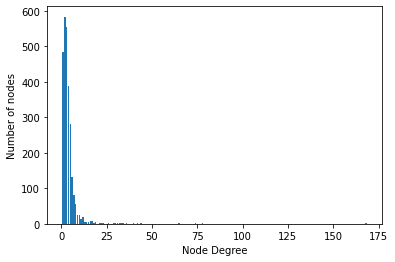

In [17]:
# Import dataset from PyTorch Geometric
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]
degrees = degree(data.edge_index[0]).numpy()
# degrees

numbers = Counter(degrees)

fig, ax = plt.subplots()
ax.set_xlabel('Node Degree')
ax.set_ylabel('Number of nodes')

plt.bar(numbers.keys(), numbers.values())

In [18]:
#### FB Page-Page dataset

Processing...
Done!


<BarContainer object of 233 artists>

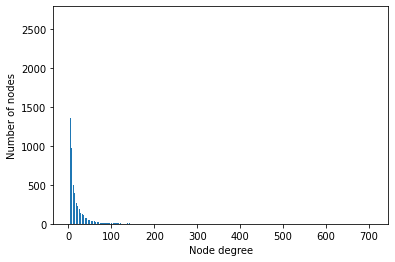

In [19]:
from torch_geometric.datasets import FacebookPagePage

# Import dataset from PyTorch Geometric
dataset = FacebookPagePage(root=".")
data = dataset[0]

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Bar plot
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [21]:
max(degrees)

709.0

## thats why we need to normalize it because there is a lot of heterogeneity in degree distribution

## Pytorch GCN on Cora

In [22]:
import torch
import torch.nn.functional as F

from torch_geometric.nn import GCNConv

In [23]:
def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

In [ ]:
class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)
        
    def forward(self, x, edge_index):
        h = self.gcn1(x,edge_index)